In [3]:
import os
import cv2
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
import shutil
from shutil import copyfile
import matplotlib.pyplot as plt
from PIL import Image
import ultralytics
from ultralytics import YOLO

In [2]:
ultralytics.checks()

Ultralytics YOLOv8.1.2 🚀 Python-3.10.0 torch-2.1.2+cpu CPU (Intel Core(TM) i7-6700 3.40GHz)
Setup complete ✅ (8 CPUs, 15.9 GB RAM, 189.8/237.9 GB disk)


In [10]:
root_path = "./podaci_detekcija/"
default_path = './podaci_detekcija/ts/ts'
train_path = './podaci_detekcija/train/'
valid_path = './podaci_detekcija/valid/'
test_path = './podaci_detekcija/test/'

In [11]:
os.makedirs(os.path.join(root_path, "images", "train"), exist_ok=True)
os.makedirs(os.path.join(root_path, "images", "valid"), exist_ok=True)
os.makedirs(os.path.join(root_path, "images", "test"), exist_ok=True)

In [12]:
os.makedirs(os.path.join(root_path, "labels", "train"), exist_ok=True)
os.makedirs(os.path.join(root_path, "labels", "valid"), exist_ok=True)
os.makedirs(os.path.join(root_path, "labels", "test"), exist_ok=True)

In [13]:
image_files = [f for f in os.listdir(default_path) if f.endswith('.jpg')]

In [14]:
random.shuffle(image_files)

In [15]:
train_ratio = 0.7
valid_ratio = 0.2
test_ratio = 0.1
total_samples = len(image_files)
train_split = int(train_ratio * total_samples)
valid_split = int((1-(train_ratio + test_ratio)) * total_samples)
train_files = image_files[:train_split]
valid_files = image_files[train_split:train_split+valid_split]
test_files = image_files[train_split+valid_split:]

In [16]:
print(f"Ukupno slika: {total_samples}")
print(f"Trening slike: {len(train_files)}")
print(f"Validacijske slike: {len(valid_files)}")
print(f"Test slike: {len(test_files)}")
print("---------------------------------------------")
print(train_files)
print(valid_files)
print(test_files)

Ukupno slika: 741
Trening slike: 518
Validacijske slike: 148
Test slike: 75
---------------------------------------------
['00483.jpg', '00658.jpg', '00315.jpg', '00100.jpg', '00057.jpg', '00181.jpg', '00720.jpg', '00280.jpg', '00728.jpg', '00655.jpg', '00645.jpg', '00359.jpg', '00459.jpg', '00647.jpg', '00258.jpg', '00521.jpg', '00209.jpg', '00762.jpg', '00641.jpg', '00862.jpg', '00238.jpg', '00263.jpg', '00613.jpg', '00133.jpg', '00198.jpg', '00045.jpg', '00242.jpg', '00124.jpg', '00465.jpg', '00069.jpg', '00245.jpg', '00396.jpg', '00370.jpg', '00282.jpg', '00513.jpg', '00530.jpg', '00672.jpg', '00093.jpg', '00387.jpg', '00149.jpg', '00080.jpg', '00304.jpg', '00098.jpg', '00846.jpg', '00742.jpg', '00778.jpg', '00010.jpg', '00218.jpg', '00855.jpg', '00839.jpg', '00008.jpg', '00271.jpg', '00272.jpg', '00857.jpg', '00240.jpg', '00809.jpg', '00498.jpg', '00725.jpg', '00811.jpg', '00097.jpg', '00142.jpg', '00237.jpg', '00241.jpg', '00686.jpg', '00509.jpg', '00620.jpg', '00042.jpg', '00378

In [17]:
for file in train_files:
  copyfile(os.path.join(default_path, file), os.path.join(root_path, "images", "train", file))
  copyfile(os.path.join(default_path, file.replace('.jpg', '.txt')), os.path.join(root_path, "labels", "train", file.replace('.jpg', '.txt')))
    
for file in valid_files:
  copyfile(os.path.join(default_path, file), os.path.join(root_path, "images", "valid", file))
  copyfile(os.path.join(default_path, file.replace('.jpg', '.txt')), os.path.join(root_path, "labels", "valid", file.replace('.jpg', '.txt')))
    
for file in test_files:
  copyfile(os.path.join(default_path, file), os.path.join(root_path, "images", "test", file))
  copyfile(os.path.join(default_path, file.replace('.jpg', '.txt')), os.path.join(root_path, "labels", "test", file.replace('.jpg', '.txt')))

In [18]:
import yaml

data_yaml = dict(
    train = 'train',
    val = 'valid',
    test = 'test',
    nc = 4,
    names =['prohibitor','danger','mandatory','other']
)

with open('data.yaml', 'w') as outfile:
    yaml.dump(data_yaml, outfile, default_flow_style=True)

In [19]:
names = ['prohibitor','danger','mandatory','other']
M = list(range(len(names)))
class_map = dict(zip(M,names))

In [20]:
model = YOLO("yolov8x.pt") 

In [21]:
results = model.train(data='./data.yaml', epochs=10, imgsz=480)
# C:\Users\DT User3\Desktop\AjdinBukvic_POOS_Projekat\podaci_detekcija\images

New https://pypi.org/project/ultralytics/8.1.6 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.2 🚀 Python-3.10.0 torch-2.1.2+cpu CPU (Intel Core(TM) i7-6700 3.40GHz)
engine\trainer: task=detect, mode=train, model=yolov8x.pt, data=./data.yaml, epochs=10, time=None, patience=50, batch=16, imgsz=480, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, 

train: Scanning C:\Users\DT User3\Desktop\AjdinBukvic_POOS_Projekat\podaci_detekcija\labels\train... 518 images, 0 backgrounds, 0 corrupt: 100%|██████████| 518/518 [00:00<00:00, 646.00it/s]


train: New cache created: C:\Users\DT User3\Desktop\AjdinBukvic_POOS_Projekat\podaci_detekcija\labels\train.cache


val: Scanning C:\Users\DT User3\Desktop\AjdinBukvic_POOS_Projekat\podaci_detekcija\labels\valid... 148 images, 0 backgrounds, 0 corrupt: 100%|██████████| 148/148 [00:00<00:00, 595.97it/s]

val: WARNING ⚠️ C:\Users\DT User3\Desktop\AjdinBukvic_POOS_Projekat\podaci_detekcija\images\valid\00340.jpg: 1 duplicate labels removed
val: New cache created: C:\Users\DT User3\Desktop\AjdinBukvic_POOS_Projekat\podaci_detekcija\labels\valid.cache


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.007       2.37     0.8448         12        480: 100%|██████████| 33/33 [23:26<00:00, 42.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:27<00:00, 17.60s/it]

                   all        148        251      0.645      0.692      0.704      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.176      1.243     0.8627          9        480: 100%|██████████| 33/33 [24:32<00:00, 44.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:26<00:00, 17.40s/it]

                   all        148        251      0.815      0.668      0.716      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G       1.21      1.105     0.8701          6        480: 100%|██████████| 33/33 [24:38<00:00, 44.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:27<00:00, 17.53s/it]

                   all        148        251      0.435      0.563      0.358      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.193     0.9567       0.87         13        480: 100%|██████████| 33/33 [24:27<00:00, 44.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:46<00:00, 21.32s/it]

                   all        148        251    0.00297     0.0178   0.000943   0.000847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      1.098     0.8233     0.8505          9        480: 100%|██████████| 33/33 [24:00<00:00, 43.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:27<00:00, 17.45s/it]

                   all        148        251      0.685      0.623      0.662      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.027     0.6963     0.8414         10        480: 100%|██████████| 33/33 [23:33<00:00, 42.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:27<00:00, 17.47s/it]

                   all        148        251       0.88      0.752      0.832      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G     0.9705     0.6519      0.833         10        480: 100%|██████████| 33/33 [22:28<00:00, 40.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:26<00:00, 17.30s/it]

                   all        148        251      0.903      0.751      0.852      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G     0.9249     0.6134     0.8229         10        480: 100%|██████████| 33/33 [24:01<00:00, 43.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:26<00:00, 17.31s/it]

                   all        148        251      0.913      0.782       0.86      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      0.852     0.5448     0.8184          9        480: 100%|██████████| 33/33 [24:07<00:00, 43.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:26<00:00, 17.29s/it]

                   all        148        251      0.948      0.769       0.88      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G     0.8247      0.508     0.8208          7        480: 100%|██████████| 33/33 [23:45<00:00, 43.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:28<00:00, 17.61s/it]

                   all        148        251      0.926      0.794      0.885      0.664



10 epochs completed in 4.239 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 136.7MB
Optimizer stripped from runs\detect\train\weights\best.pt, 136.7MB

Validating runs\detect\train\weights\best.pt...
Ultralytics YOLOv8.1.2 🚀 Python-3.10.0 torch-2.1.2+cpu CPU (Intel Core(TM) i7-6700 3.40GHz)
Model summary (fused): 268 layers, 68127420 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:21<00:00, 16.34s/it]


                   all        148        251      0.925      0.794      0.885      0.665
            prohibitor        148        135      0.963      0.896      0.957      0.722
                danger        148         49          1      0.845      0.962      0.721
             mandatory        148         25      0.784       0.72      0.814      0.639
                 other        148         42      0.955      0.714      0.808      0.578
Speed: 1.4ms preprocess, 533.1ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs\detect\train


In [22]:
metrics = model.val()

Ultralytics YOLOv8.1.2 🚀 Python-3.10.0 torch-2.1.2+cpu CPU (Intel Core(TM) i7-6700 3.40GHz)
Model summary (fused): 268 layers, 68127420 parameters, 0 gradients, 257.4 GFLOPs


val: Scanning C:\Users\DT User3\Desktop\AjdinBukvic_POOS_Projekat\podaci_detekcija\labels\valid.cache... 148 images, 0 backgrounds, 0 corrupt: 100%|██████████| 148/148 [00:00<?, ?it/s]

val: WARNING ⚠️ C:\Users\DT User3\Desktop\AjdinBukvic_POOS_Projekat\podaci_detekcija\images\valid\00340.jpg: 1 duplicate labels removed



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [01:17<00:00,  7.72s/it]


                   all        148        251      0.925      0.794      0.885      0.665
            prohibitor        148        135      0.963      0.896      0.957      0.722
                danger        148         49          1      0.845      0.962      0.721
             mandatory        148         25      0.784       0.72      0.814      0.639
                 other        148         42      0.955      0.714      0.808      0.578
Speed: 1.3ms preprocess, 502.2ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs\detect\train2


In [29]:
print("Metrika validacijskog seta:")
print(metrics.box.map)
print(metrics.box.map50)

Metrika validacijskog seta:
0.6651993677231769
0.884923596341856


In [30]:
metrics = model.val(split="test")

Ultralytics YOLOv8.1.2 🚀 Python-3.10.0 torch-2.1.2+cpu CPU (Intel Core(TM) i7-6700 3.40GHz)


val: Scanning C:\Users\DT User3\Desktop\AjdinBukvic_POOS_Projekat\podaci_detekcija\labels\test... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<00:00, 844.95it/s]

val: New cache created: C:\Users\DT User3\Desktop\AjdinBukvic_POOS_Projekat\podaci_detekcija\labels\test.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:43<00:00,  8.64s/it]


                   all         75        124      0.941      0.868      0.927      0.705
            prohibitor         75         54      0.885          1      0.993      0.774
                danger         75         21          1      0.986      0.995      0.786
             mandatory         75         17      0.953      0.706      0.853      0.623
                 other         75         32      0.926      0.781      0.869      0.636
Speed: 1.3ms preprocess, 555.9ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs\detect\train4


In [31]:
print("Metrika testnog seta:")
print(metrics.box.map)
print(metrics.box.map50)

Metrika testnog seta:
0.7048825672770999
0.9273683083370404


In [25]:
success = model.export(format="onnx")

Ultralytics YOLOv8.1.2 🚀 Python-3.10.0 torch-2.1.2+cpu CPU (Intel Core(TM) i7-6700 3.40GHz)

PyTorch: starting from 'runs\detect\train\weights\best.pt' with input shape (1, 3, 480, 480) BCHW and output shape(s) (1, 8, 4725) (130.4 MB)

ONNX: starting export with onnx 1.15.0 opset 17...
ONNX: export success ✅ 4.7s, saved as 'runs\detect\train\weights\best.onnx' (260.0 MB)

Export complete (7.8s)
Results saved to C:\Users\DT User3\Desktop\AjdinBukvic_POOS_Projekat\runs\detect\train\weights
Predict:         yolo predict task=detect model=runs\detect\train\weights\best.onnx imgsz=480  
Validate:        yolo val task=detect model=runs\detect\train\weights\best.onnx imgsz=480 data=./data.yaml  
Visualize:       https://netron.app


In [26]:
results = model.predict("./podaci_detekcija/images/test/", save=True, conf=0.5)


image 1/75 c:\Users\DT User3\Desktop\AjdinBukvic_POOS_Projekat\podaci_detekcija\images\test\00037.jpg: 288x480 (no detections), 511.6ms
image 2/75 c:\Users\DT User3\Desktop\AjdinBukvic_POOS_Projekat\podaci_detekcija\images\test\00072.jpg: 288x480 (no detections), 480.7ms
image 3/75 c:\Users\DT User3\Desktop\AjdinBukvic_POOS_Projekat\podaci_detekcija\images\test\00087.jpg: 288x480 1 other, 582.4ms
image 4/75 c:\Users\DT User3\Desktop\AjdinBukvic_POOS_Projekat\podaci_detekcija\images\test\00089.jpg: 288x480 2 prohibitors, 520.6ms
image 5/75 c:\Users\DT User3\Desktop\AjdinBukvic_POOS_Projekat\podaci_detekcija\images\test\00092.jpg: 288x480 1 mandatory, 2 others, 576.5ms
image 6/75 c:\Users\DT User3\Desktop\AjdinBukvic_POOS_Projekat\podaci_detekcija\images\test\00106.jpg: 288x480 1 danger, 559.5ms
image 7/75 c:\Users\DT User3\Desktop\AjdinBukvic_POOS_Projekat\podaci_detekcija\images\test\00119.jpg: 288x480 1 other, 549.5ms
image 8/75 c:\Users\DT User3\Desktop\AjdinBukvic_POOS_Projekat\pod

['./runs/detect/train3/00234.jpg', './runs/detect/train3/00441.jpg', './runs/detect/train3/00851.jpg', './runs/detect/train3/00624.jpg', './runs/detect/train3/00352.jpg', './runs/detect/train3/00866.jpg', './runs/detect/train3/00887.jpg', './runs/detect/train3/00871.jpg', './runs/detect/train3/00266.jpg', './runs/detect/train3/00297.jpg', './runs/detect/train3/00681.jpg', './runs/detect/train3/00119.jpg', './runs/detect/train3/00755.jpg', './runs/detect/train3/00344.jpg', './runs/detect/train3/00782.jpg', './runs/detect/train3/00669.jpg']


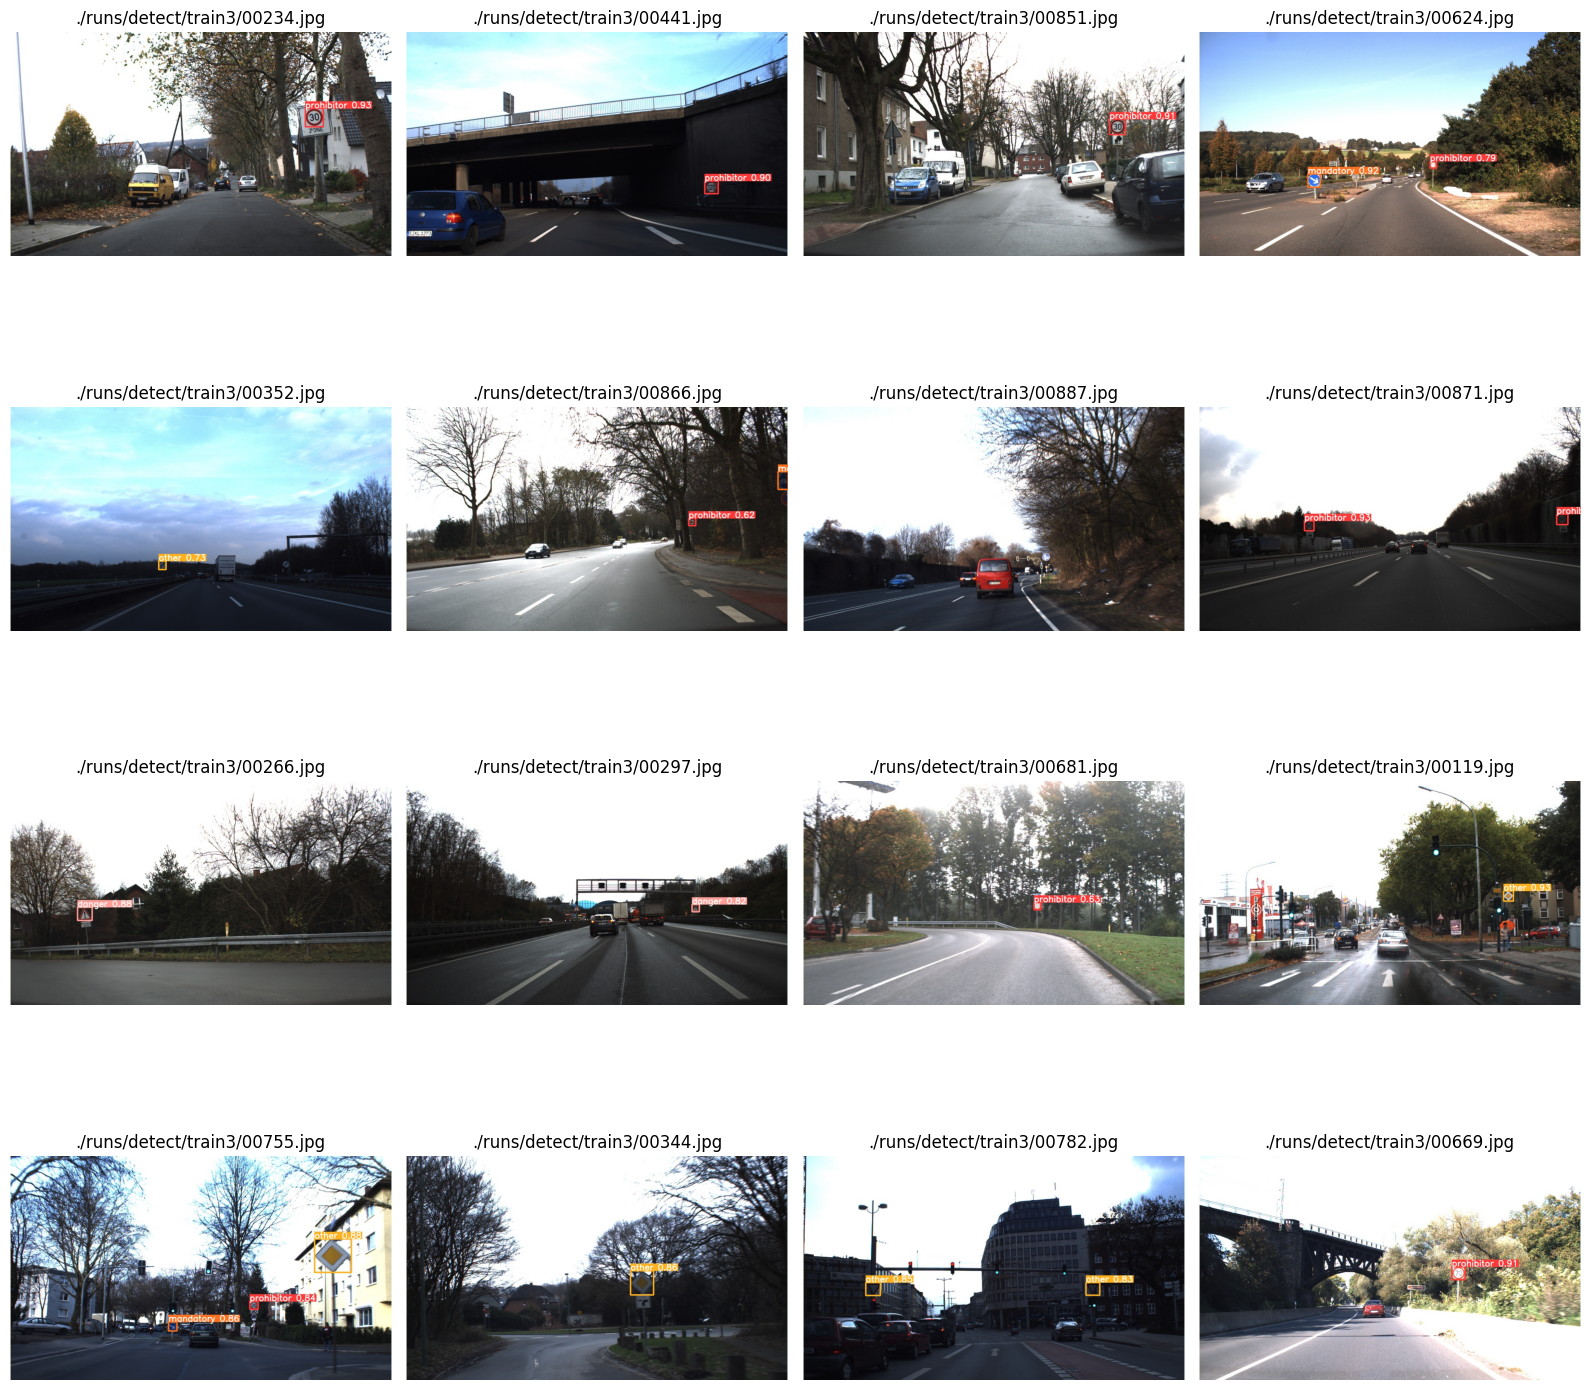

In [8]:
import matplotlib.image as mpimg
import random

image_files = [os.path.join('./runs/detect/train3/',f) for f in os.listdir('./podaci_detekcija/images/test/') if f.endswith('.jpg')]
random.shuffle(image_files)
selected_images = image_files[:16]
print(selected_images)
fig, axes = plt.subplots(4, 4, figsize=(16, 16))
for i, image_file in enumerate(selected_images):
  row, col = divmod(i, 4)
  img_path = image_file
  img = mpimg.imread(img_path)
  axes[row, col].imshow(img)
  axes[row, col].axis('off')
  axes[row, col].set_title(image_file)
plt.tight_layout()
plt.show()